# Laboratorio 2 
## Series de Tiempo

Jose Jorge Perez 18364, Diego Ruiz 18761

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

In [13]:
consumo = pd.read_excel("CONSUMO-2023-05.xlsx")
consumo

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Kerosina,Mezclas\noleosas,Naftas,PetCoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,Orimulsión,Total
0,2000-01-01 00:00:00,0.00,48446.00,296766.99,0.00,0.00,0.00,0.00,194410.476190,1426.00,...,64026.09,0.00,0.00,0.00,0.00,0.00,0.0,634667.06,0.0,1.750545e+06
1,2000-02-01 00:00:00,0.00,50597.00,328116.44,0.00,0.00,0.00,0.00,174710.552381,1458.00,...,62660.30,0.00,0.00,0.00,0.00,0.00,0.0,642380.66,0.0,1.773220e+06
2,2000-03-01 00:00:00,0.00,27593.00,368589.63,0.00,0.00,0.00,0.00,189234.066667,1503.00,...,61361.99,0.00,0.00,0.00,0.00,0.00,0.0,699807.25,0.0,1.909499e+06
3,2000-04-01 00:00:00,0.00,53794.00,396300.47,0.00,0.00,0.00,0.00,174330.607143,1561.00,...,61814.32,0.00,0.00,0.00,0.00,0.00,0.0,586803.98,0.0,1.800933e+06
4,2000-05-01 00:00:00,0.00,60137.00,449368.92,0.00,0.00,0.00,0.00,191745.147619,1642.00,...,54098.32,0.00,0.00,0.00,0.00,0.00,0.0,656948.20,0.0,1.941772e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2023-03-01 00:00:00,31025.18,69630.40,194492.83,NaN,83431.51,1463008.43,11462.71,588892.160000,1514.78,...,-1882.43,2024.49,268.68,311475.22,112090.14,12781.27,0.0,0.00,0.0,4.412649e+06
279,2023-04-01 00:00:00,22208.24,74654.67,157844.83,-841.64,80733.64,1248429.37,10553.37,513919.890000,1390.03,...,-1568.78,940.32,108.23,322290.11,96434.73,13410.95,0.0,0.00,0.0,3.924689e+06
280,2023-05-01 00:00:00,25230.27,76296.87,221002.66,-797.34,73860.95,1346554.12,12201.45,565814.790000,1790.83,...,-2825.20,1652.70,325.27,508981.62,114448.93,15206.96,0.0,0.00,0.0,4.473316e+06
281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
importacion = pd.read_excel("IMPORTACION-VOLUMEN-2023-05.xlsx")
importacion

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Naftas,Petcoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,MTBE,Orimulsión,Petróleo reconstituido,Total importación
0,2001-01-01 00:00:00,0.00,27748.99,214581.84,0.00,0.00,0.00,0.00,194065.738095,820.00,...,0.00,0.0,0.00,0.00,0.0,566101.99,8402.0,0.0,715344.0,2.312639e+06
1,2001-02-01 00:00:00,0.00,7503.57,294609.00,0.00,0.00,0.00,0.00,170703.380952,3054.00,...,0.00,0.0,0.00,0.00,0.0,489525.80,0.0,0.0,370166.0,1.769209e+06
2,2001-03-01 00:00:00,0.00,26304.32,315263.80,0.00,0.00,0.00,0.00,161837.371429,677.00,...,0.00,0.0,0.00,0.00,0.0,575559.68,0.0,0.0,360530.0,1.945770e+06
3,2001-04-01 00:00:00,0.00,7885.89,205653.00,0.00,0.00,0.00,0.00,163048.642857,3399.00,...,0.00,0.0,0.00,0.00,0.0,437745.42,8184.0,0.0,359527.0,1.623638e+06
4,2001-05-01 00:00:00,0.00,8443.16,278371.30,0.00,0.00,0.00,0.00,171518.861905,585.00,...,0.00,0.0,0.00,0.00,0.0,552609.13,12680.0,0.0,723346.0,2.262727e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,2023-03-01 00:00:00,30789.61,128594.46,149590.82,NaN,66515.19,1317519.91,4985.21,711978.350000,0.00,...,330.59,249231.0,1474.00,12599.78,0.0,0.00,0.0,0.0,0.0,4.115430e+06
267,2023-04-01 00:00:00,25001.96,119761.46,134010.55,86.43,123298.87,1417182.73,21503.98,647666.300000,1840.46,...,40.00,0.0,1811.06,19941.64,0.0,0.00,0.0,0.0,0.0,4.008479e+06
268,2023-05-01 00:00:00,30440.94,171826.96,234819.33,6.00,94150.63,1428099.62,15047.82,713348.990000,0.00,...,388.51,525292.8,621.00,16858.33,0.0,0.00,0.0,0.0,0.0,4.850360e+06
269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
precios = pd.read_excel("Precios-Promedio-Nacionales-Diarios-2023.xlsx")
precios

,FECHA,Tipo de Cambio,Superior,Regular,Diesel,Bunker,Glp Cilindro 25Lbs.,Unnamed: 7
0,2023-01-01 00:00:00,7.85222,32.55,30.99,33.75,15.99,122.0,4.88
1,2023-01-02 00:00:00,7.85222,32.55,30.99,33.75,15.99,122.0,4.88
2,2023-01-03 00:00:00,7.84773,32.56,31.42,35.31,16.39,122.0,4.88
3,2023-01-04 00:00:00,7.84906,32.56,31.42,35.31,16.39,122.0,4.88
4,2023-01-05 00:00:00,7.85221,32.56,31.42,35.31,16.39,122.0,4.88
...,...,...,...,...,...,...,...,...
222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,Fuente precios nacionales: Sección Comercializ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
def see_unique_values_df(data_frame):
    for i in data_frame:
        print(f"\n=> {i}")
        print(data_frame[i].unique())
        
def check_data_frame(df):
    print(df.info())
    missing_values = df.isnull().sum()
    print(f'VALORES NULOS:\n {missing_values}')
    return df

## Analisis exploratorio

In [22]:
consumo.iloc[0,:]

Fecha                       2000-01-01 00:00:00
Aceites lubricantes                         0.0
Asfalto                                 48446.0
Bunker                                296766.99
Ceras                                       0.0
Combustible turbo jet                       0.0
Diesel bajo azufre                          0.0
Diesel ultra bajo azufre                    0.0
Gas licuado de petróleo            194410.47619
Gasolina de aviación                     1426.0
Gasolina regular                       202645.2
Gasolina superior                     308156.82
Grasas lubricantes                          0.0
Kerosina                               64026.09
Mezclas\noleosas                            0.0
Naftas                                      0.0
PetCoke                                     0.0
Petróleo crudo                              0.0
Solventes                                   0.0
Butano                                      0.0
Diesel alto azufre                    63

In [25]:
consumo.dtypes.values

array([dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64')], dtype=object)

In [23]:
importacion.iloc[0,:]

Fecha                       2001-01-01 00:00:00
Aceites lubricantes                         0.0
Asfalto                                27748.99
Bunker                                214581.84
Ceras                                       0.0
Combustible turbo jet                       0.0
Diesel bajo azufre                          0.0
Diesel ultra bajo azufre                    0.0
Gas licuado de petróleo           194065.738095
Gasolina de aviación                      820.0
Gasolina regular                       177776.5
Gasolina superior                     373963.96
Grasas lubricantes                          0.0
Kerosina                               33834.03
Mezclas oleosas                             0.0
Naftas                                      0.0
Petcoke                                     0.0
Petróleo crudo                              0.0
Solventes                                   0.0
Butano                                      0.0
Diesel alto azufre                    56

In [26]:
importacion.dtypes.values

array([dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64')], dtype=object)

In [24]:
precios.iloc[0,:]

FECHA                  2023-01-01 00:00:00
Tipo de Cambio                     7.85222
Superior                             32.55
Regular                              30.99
Diesel                               33.75
Bunker                               15.99
Glp Cilindro 25Lbs.                  122.0
Unnamed: 7                            4.88
Name: 0, dtype: object

In [27]:
precios.dtypes.values

array([dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64')], dtype=object)

## Limpieza

In [28]:
consumo = consumo.fillna(-1)

consumo.rename(columns={'Mezclas\noleosas':'Mezclas oleosas'}, inplace=True)

consumo.rename(columns={'Orimulsión':'Orimulsion'}, inplace=True)
consumo.rename(columns={'Gas licuado de petróleo':'Gas licuado petroleo'}, inplace=True)
consumo.rename(columns={'Gasolina de aviación':'Gasolina aviacion'}, inplace=True)

consumo.drop(consumo.index[-2:], inplace=True)

consumo['Fecha'] = pd.to_datetime(consumo['Fecha'])
consumo['Fecha'] = consumo['Fecha'].dt.date
consumo['Fecha'] = pd.to_datetime(consumo['Fecha'])

consumo['Anio'] = consumo['Fecha'].dt.year

In [35]:
consumo.to_csv('output/consumo.csv', index=False)
consumo

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado petroleo,Gasolina aviacion,...,Mezclas oleosas,Naftas,PetCoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,Orimulsion,Total,Anio
0,2000-01-01,0.00,48446.00,296766.99,0.00,0.00,0.00,0.00,194410.476190,1426.00,...,0.00,0.00,0.00,0.00,0.00,0.0,634667.06,0.0,1.750545e+06,2000
1,2000-02-01,0.00,50597.00,328116.44,0.00,0.00,0.00,0.00,174710.552381,1458.00,...,0.00,0.00,0.00,0.00,0.00,0.0,642380.66,0.0,1.773220e+06,2000
2,2000-03-01,0.00,27593.00,368589.63,0.00,0.00,0.00,0.00,189234.066667,1503.00,...,0.00,0.00,0.00,0.00,0.00,0.0,699807.25,0.0,1.909499e+06,2000
3,2000-04-01,0.00,53794.00,396300.47,0.00,0.00,0.00,0.00,174330.607143,1561.00,...,0.00,0.00,0.00,0.00,0.00,0.0,586803.98,0.0,1.800933e+06,2000
4,2000-05-01,0.00,60137.00,449368.92,0.00,0.00,0.00,0.00,191745.147619,1642.00,...,0.00,0.00,0.00,0.00,0.00,0.0,656948.20,0.0,1.941772e+06,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2023-01-01,26561.43,77035.87,105294.71,-380.72,73581.22,1285932.51,9391.16,574148.000000,1224.04,...,2222.59,142.63,427535.42,112435.87,7647.92,0.0,0.00,0.0,4.112994e+06,2023
277,2023-02-01,25743.23,74416.24,116577.42,-287.62,66761.16,1226884.63,8398.95,497273.190000,1134.43,...,1133.80,145.61,311098.09,100237.67,16166.19,0.0,0.00,0.0,3.728619e+06,2023
278,2023-03-01,31025.18,69630.40,194492.83,-1.00,83431.51,1463008.43,11462.71,588892.160000,1514.78,...,2024.49,268.68,311475.22,112090.14,12781.27,0.0,0.00,0.0,4.412649e+06,2023
279,2023-04-01,22208.24,74654.67,157844.83,-841.64,80733.64,1248429.37,10553.37,513919.890000,1390.03,...,940.32,108.23,322290.11,96434.73,13410.95,0.0,0.00,0.0,3.924689e+06,2023


In [29]:
importacion = importacion.fillna(-1)

importacion.rename(columns={'Gas licuado de petróleo':'Gas licuado petroleo'}, inplace=True)
importacion.rename(columns={'Gasolina de aviación':'Gasolina aviacion'}, inplace=True)
importacion.rename(columns={'Petróleo crudo':'Petroleo crudo'}, inplace=True)
importacion.rename(columns={'Petróleo reconstituido':'Petroleo reconstituido'}, inplace=True)
importacion.rename(columns={'Orimulsión':'Orimulsion'}, inplace=True)
importacion.rename(columns={'Total importación':'Total'}, inplace=True)
importacion
importacion.drop(importacion.index[-2:], inplace=True)

importacion['Fecha'] = pd.to_datetime(importacion['Fecha'])
importacion['Fecha'] = importacion['Fecha'].dt.date
importacion['Fecha'] = pd.to_datetime(importacion['Fecha'])

importacion['Anio'] = importacion['Fecha'].dt.year

In [36]:
importacion.to_csv('output/importacion.csv', index=False)
importacion

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado petroleo,Gasolina aviacion,...,Petcoke,Petroleo crudo,Solventes,Butano,Diesel alto azufre,MTBE,Orimulsion,Petroleo reconstituido,Total,Anio
0,2001-01-01,0.00,27748.99,214581.84,0.00,0.00,0.00,0.00,194065.738095,820.00,...,0.00,0.00,0.00,0.0,566101.99,8402.0,0.0,715344.0,2.312639e+06,2001
1,2001-02-01,0.00,7503.57,294609.00,0.00,0.00,0.00,0.00,170703.380952,3054.00,...,0.00,0.00,0.00,0.0,489525.80,0.0,0.0,370166.0,1.769209e+06,2001
2,2001-03-01,0.00,26304.32,315263.80,0.00,0.00,0.00,0.00,161837.371429,677.00,...,0.00,0.00,0.00,0.0,575559.68,0.0,0.0,360530.0,1.945770e+06,2001
3,2001-04-01,0.00,7885.89,205653.00,0.00,0.00,0.00,0.00,163048.642857,3399.00,...,0.00,0.00,0.00,0.0,437745.42,8184.0,0.0,359527.0,1.623638e+06,2001
4,2001-05-01,0.00,8443.16,278371.30,0.00,0.00,0.00,0.00,171518.861905,585.00,...,0.00,0.00,0.00,0.0,552609.13,12680.0,0.0,723346.0,2.262727e+06,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2023-01-01,25028.49,11654.23,132458.17,7.86,65808.97,1442099.08,45074.97,497780.690000,0.00,...,0.00,215.00,4491.66,0.0,0.00,0.0,0.0,0.0,3.718296e+06,2023
265,2023-02-01,23565.09,25564.76,123451.93,152.00,154166.84,1267967.39,0.00,652984.710000,24776.42,...,870158.29,212.90,21630.09,0.0,0.00,0.0,0.0,0.0,4.577891e+06,2023
266,2023-03-01,30789.61,128594.46,149590.82,-1.00,66515.19,1317519.91,4985.21,711978.350000,0.00,...,249231.00,1474.00,12599.78,0.0,0.00,0.0,0.0,0.0,4.115430e+06,2023
267,2023-04-01,25001.96,119761.46,134010.55,86.43,123298.87,1417182.73,21503.98,647666.300000,1840.46,...,0.00,1811.06,19941.64,0.0,0.00,0.0,0.0,0.0,4.008479e+06,2023


In [30]:
precios = precios.fillna(-1)

precios.drop(precios.index[-2:], inplace=True)

precios.rename(columns={'FECHA':'Fecha'}, inplace=True)

precios = precios[precios['Fecha'] != -1]

precios['Fecha'] = pd.to_datetime(precios['Fecha'])
precios['Fecha'] = precios['Fecha'].dt.date
precios['Fecha'] = pd.to_datetime(precios['Fecha'])

precios['Anio'] = precios['Fecha'].dt.year

In [37]:
precios.to_csv('output/precios.csv', index=False)
precios

,Fecha,Tipo de Cambio,Superior,Regular,Diesel,Bunker,Glp Cilindro 25Lbs.,Unnamed: 7,Anio
0,2023-01-01,7.85222,32.55,30.99,33.75,15.99,122.0,4.88,2023
1,2023-01-02,7.85222,32.55,30.99,33.75,15.99,122.0,4.88,2023
2,2023-01-03,7.84773,32.56,31.42,35.31,16.39,122.0,4.88,2023
3,2023-01-04,7.84906,32.56,31.42,35.31,16.39,122.0,4.88,2023
4,2023-01-05,7.85221,32.56,31.42,35.31,16.39,122.0,4.88,2023
...,...,...,...,...,...,...,...,...,...
213,2023-08-02,7.86984,36.29,34.77,29.68,20.54,135.0,5.40,2023
214,2023-08-03,-1.00000,36.29,34.77,29.68,20.54,135.0,5.40,2023
215,2023-08-04,-1.00000,36.29,34.77,29.68,20.54,135.0,5.40,2023
216,2023-08-05,-1.00000,36.29,34.77,29.68,20.54,135.0,5.40,2023


In [40]:
consumo = pd.read_csv('output/consumo.csv')
consumo['Fecha'] = pd.to_datetime(consumo['Fecha'])
consumo['Anio'] = consumo['Fecha'].dt.year

importacion = pd.read_csv('output/importacion.csv')
importacion['Fecha'] = pd.to_datetime(importacion['Fecha'])
importacion['Anio'] = importacion['Fecha'].dt.year

Se utilizaran las columnas gasolinas regular, super, diesel y gas licuado, fecha y total.

In [41]:
def descriptive_statics(df):
    columns_of_interest = ['Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre',
                        'Diesel ultra bajo azufre', 'Diesel alto azufre', 'Gas licuado petroleo']
    subset_df = df[columns_of_interest]

    return subset_df.describe()

def plotting_distribution(subset_df, type_g : str):
    subset_df.hist(bins=20, figsize=(12, 8))
    plt.suptitle(f"Distribución de Variables de {type_g} de Combustible")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def plotting_behavior_gas_by_months(df, type_g : str):
    results_by_month = df.groupby(df['Fecha'].dt.month)['Total'].sum()
    plt.figure(figsize=(10, 6))
    results_by_month.plot(kind='bar', color='blue')
    plt.title(f'{type_g} de Gasolina por Mes')
    plt.xlabel('Mes')
    plt.ylabel(f'Total de {type_g}')
    plt.xticks(rotation=0)
    plt.show()

In [42]:
d_statics_consum = descriptive_statics(consumo)
d_statics_consum

,Gasolina regular,Gasolina superior,Diesel bajo azufre,Diesel ultra bajo azufre,Diesel alto azufre,Gas licuado petroleo
count,281.000000,281.000000,2.810000e+02,281.000000,2.810000e+02,281.000000
mean,367626.393713,457160.659412,2.603631e+05,2303.973381,5.925927e+05,303105.399669
std,192320.697369,104043.501753,4.804376e+05,4363.660816,3.478895e+05,101787.584186
min,160741.900000,300242.781667,0.000000e+00,0.000000,0.000000e+00,167818.137897
25%,213645.390000,381595.195833,0.000000e+00,0.000000,5.578026e+05,225593.823095
50%,275031.210000,416497.410000,0.000000e+00,0.000000,6.998072e+05,256040.102381
75%,502041.670000,551000.790000,0.000000e+00,0.000000,8.076921e+05,373503.775714
max,875010.340000,768102.830000,1.463008e+06,16475.250000,1.216423e+06,588892.160000


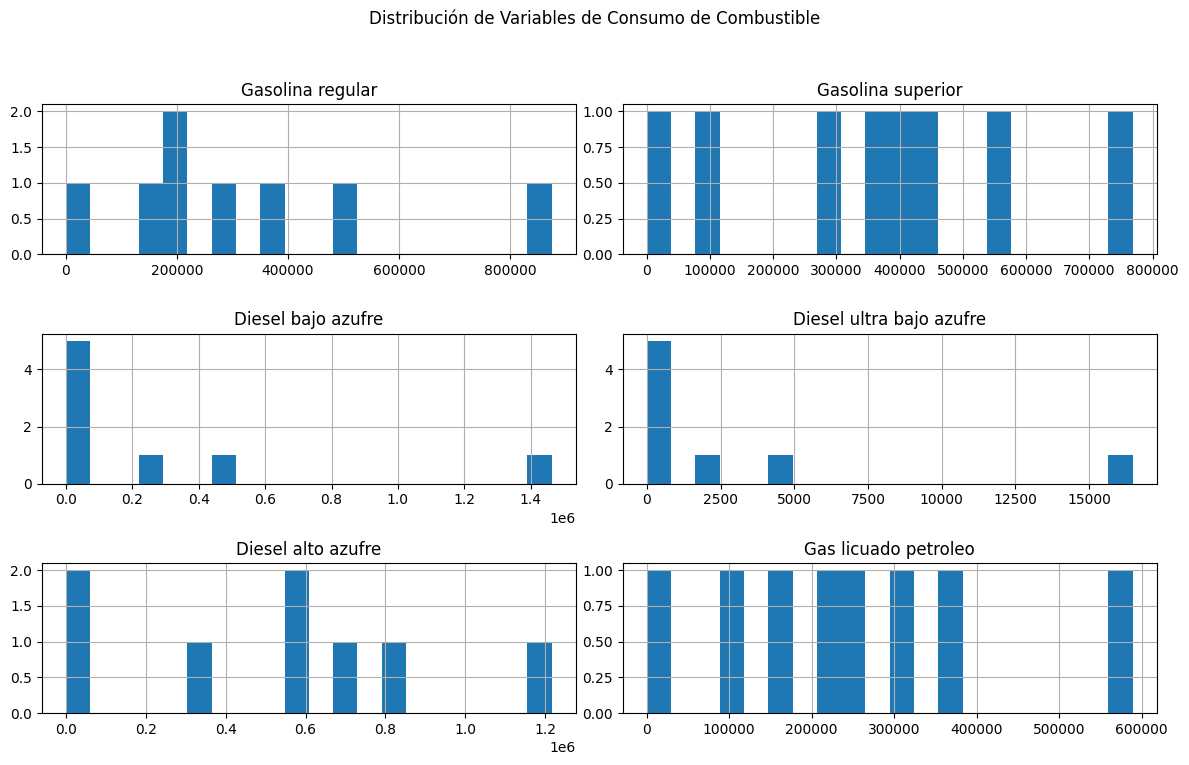

In [43]:
plotting_distribution(d_statics_consum, "Consumo")

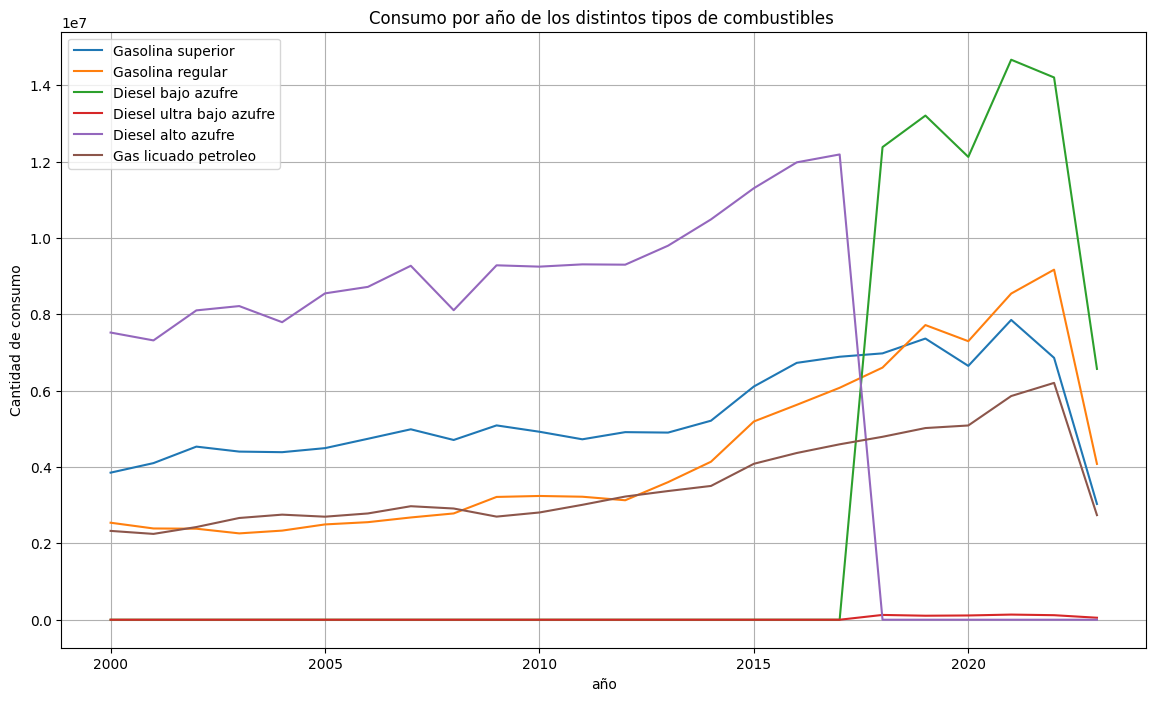

In [46]:
# Comportamiento de los combustibles en los últimos años
fuel_types_to_plot = [
    "Gasolina superior",
    "Gasolina regular",
    "Diesel bajo azufre",
    "Diesel ultra bajo azufre",
    "Diesel alto azufre",
    "Gas licuado petroleo",
]

consumption_columns_exist = all(fuel_type in consumo.columns for fuel_type in fuel_types_to_plot)
consumption_columns_exist, consumo.columns if not consumption_columns_exist else None
yearly_consumption_data = consumo.groupby('Anio')[fuel_types_to_plot].sum().reset_index()

plt.figure(figsize=(14, 8))
for fuel_type in fuel_types_to_plot:
    plt.plot(yearly_consumption_data['Anio'], yearly_consumption_data[fuel_type], label=fuel_type)

plt.title('Consumo por año de los distintos tipos de combustibles ')
plt.xlabel('año')
plt.ylabel('Cantidad de consumo')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
d_statics_import = descriptive_statics(importacion)
d_statics_import

,Gasolina regular,Gasolina superior,Diesel bajo azufre,Diesel ultra bajo azufre,Diesel alto azufre,Gas licuado petroleo
count,269.000000,2.690000e+02,2.690000e+02,269.000000,2.690000e+02,269.000000
mean,381883.121315,4.782882e+05,2.707193e+05,2644.297993,5.932604e+05,399026.255764
std,219364.354874,1.532780e+05,4.923333e+05,8639.971237,3.955986e+05,190173.418737
min,81015.300000,1.702925e+05,0.000000e+00,0.000000,0.000000e+00,100561.466667
25%,201907.670000,3.633527e+05,0.000000e+00,0.000000,3.219529e+05,218257.510952
50%,305285.530000,4.565884e+05,0.000000e+00,0.000000,6.836644e+05,396363.050000
75%,528347.810000,5.823743e+05,0.000000e+00,0.000000,8.508069e+05,540671.880952
max,987872.050000,1.227174e+06,1.592580e+06,48945.910000,1.595699e+06,960840.530000


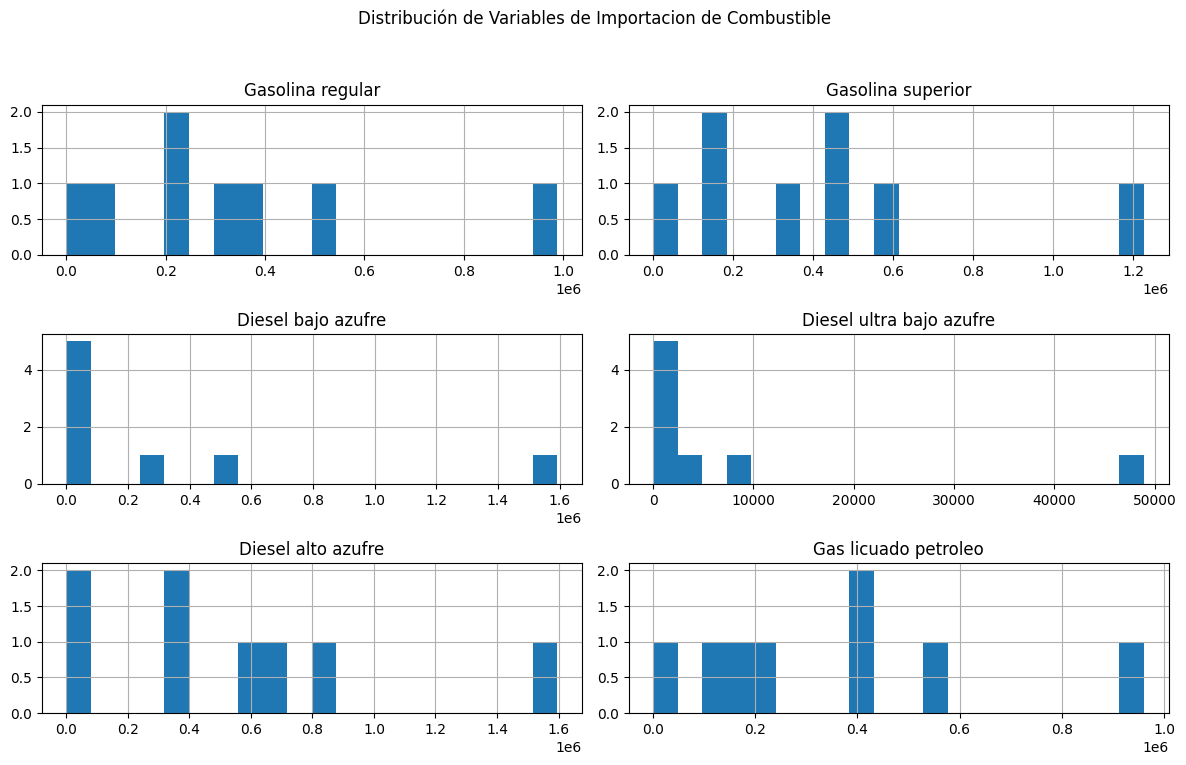

In [45]:
plotting_distribution(d_statics_import, "Importacion")

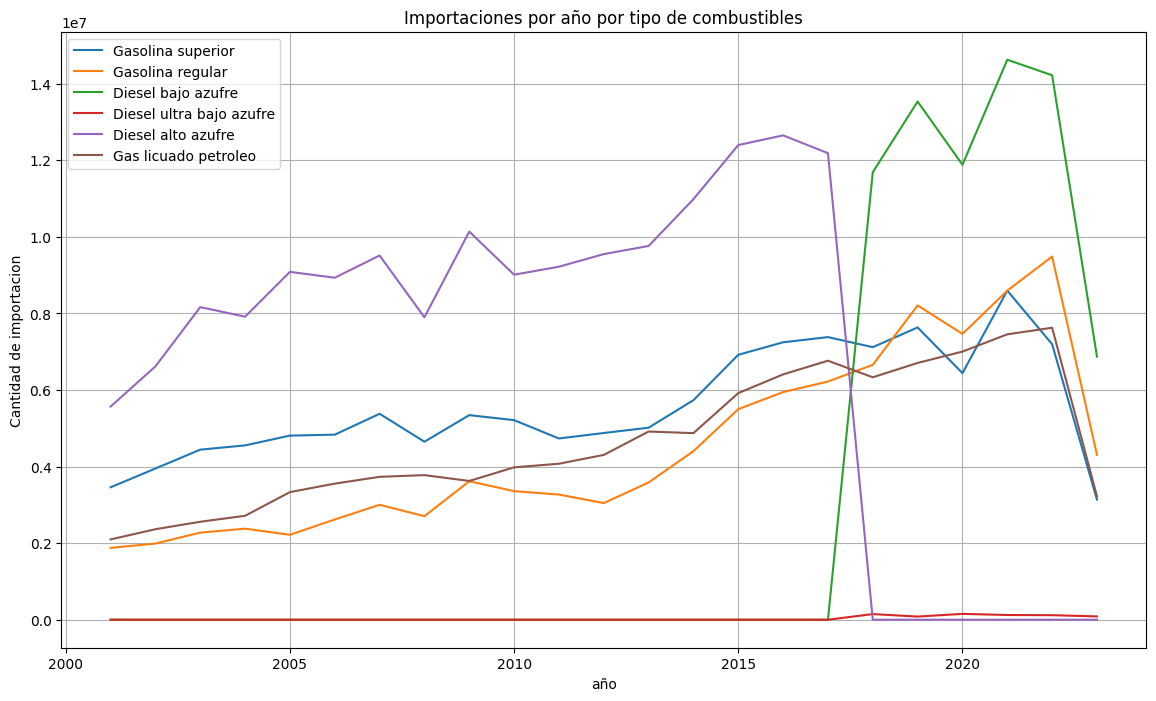

In [47]:
import matplotlib.pyplot as plt

fuel_types_to_plot = [
    "Gasolina superior",
    "Gasolina regular",
    "Diesel bajo azufre",
    "Diesel ultra bajo azufre",
    "Diesel alto azufre",
    "Gas licuado petroleo",
]

columns_exist = all(fuel_type in importacion.columns for fuel_type in fuel_types_to_plot)
columns_exist, importacion.columns if not columns_exist else None

yearly_import_data = importacion.groupby('Anio')[fuel_types_to_plot].sum().reset_index()

plt.figure(figsize=(14, 8))
for fuel_type in fuel_types_to_plot:
    plt.plot(yearly_import_data['Anio'], yearly_import_data[fuel_type], label=fuel_type)

plt.title('Importaciones por año por tipo de combustibles')
plt.xlabel('año')
plt.ylabel('Cantidad de importacion')
plt.legend()
plt.grid(True)
plt.show()

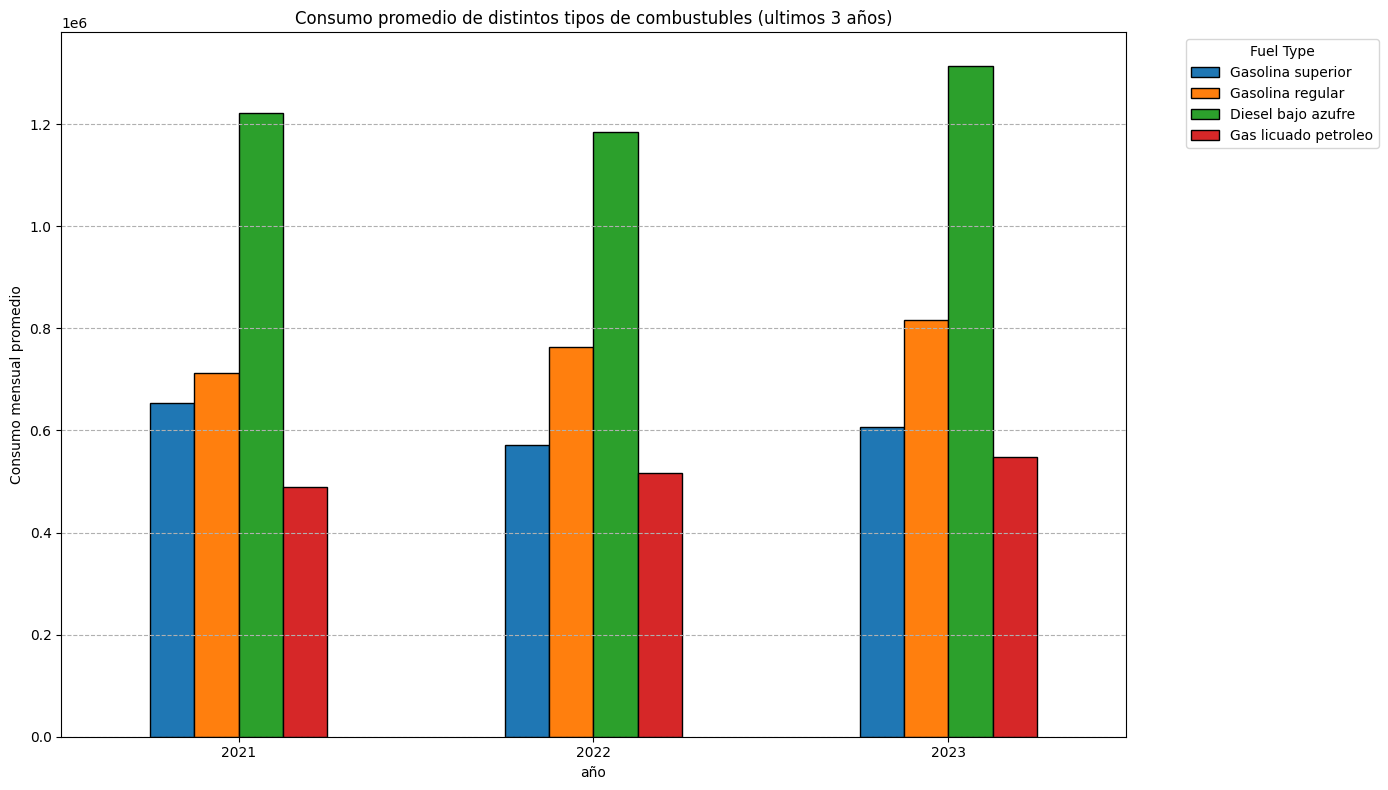

In [48]:
import matplotlib.pyplot as plt

fuel_types_to_calculate = [
    "Gasolina superior",
    "Gasolina regular",
    "Diesel bajo azufre",
    "Gas licuado petroleo",
]
latest_year = consumo['Anio'].max()


last_three_years_data = consumo[consumo['Anio'].isin([latest_year - 2, latest_year - 1, latest_year])]

average_monthly_consumption_last_three_years = last_three_years_data.groupby('Anio')[fuel_types_to_calculate].mean()

average_monthly_consumption_last_three_years.plot(kind='bar', figsize=(14, 8), edgecolor='black')

plt.title('Consumo promedio de distintos tipos de combustubles (ultimos 3 años)')
plt.xlabel('año')
plt.ylabel('Consumo mensual promedio')
plt.xticks(rotation=0)
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Series de tiempo en tipos de gasolina

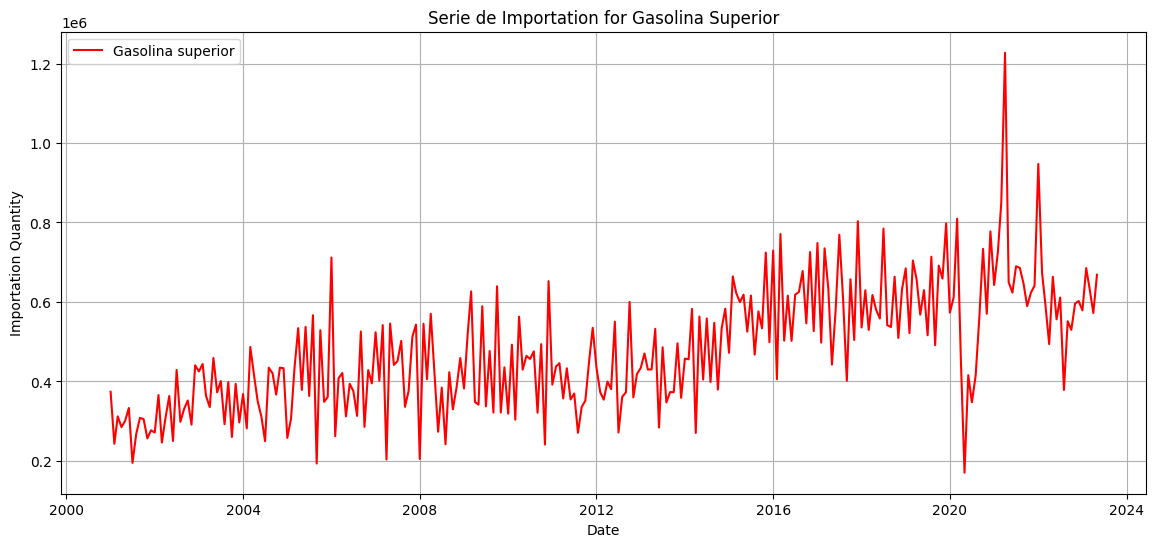

In [50]:
import matplotlib.pyplot as plt
start_date_import = importacion['Fecha'].min()
end_date_import = importacion['Fecha'].max()
frequency_import = "Monthly" 

start_date_import, end_date_import, frequency_import

plt.figure(figsize=(14, 6))
plt.plot(importacion['Fecha'], importacion['Gasolina superior'], label='Gasolina superior', color='red')
plt.title('Serie de Importation for Gasolina Superior')
plt.xlabel('Date')
plt.ylabel('Importation Quantity')
plt.grid(True)
plt.legend()
plt.show()

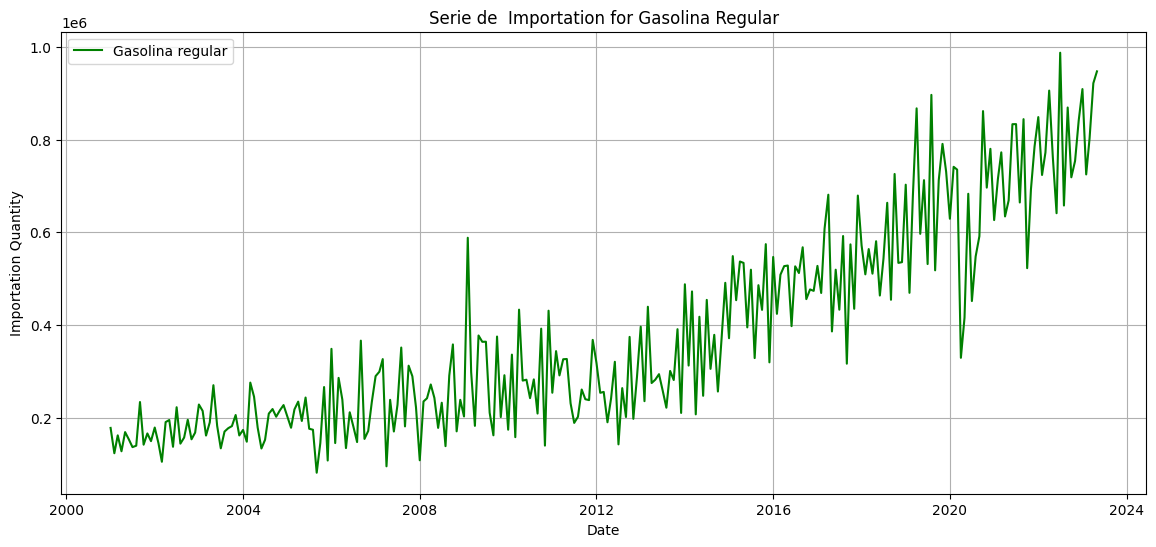

In [52]:
plt.figure(figsize=(14, 6))
plt.plot(importacion['Fecha'], importacion['Gasolina regular'], label='Gasolina regular', color='green')
plt.title('Serie de  Importation for Gasolina Regular')
plt.xlabel('Date')
plt.ylabel('Importation Quantity')
plt.grid(True)
plt.legend()
plt.show()

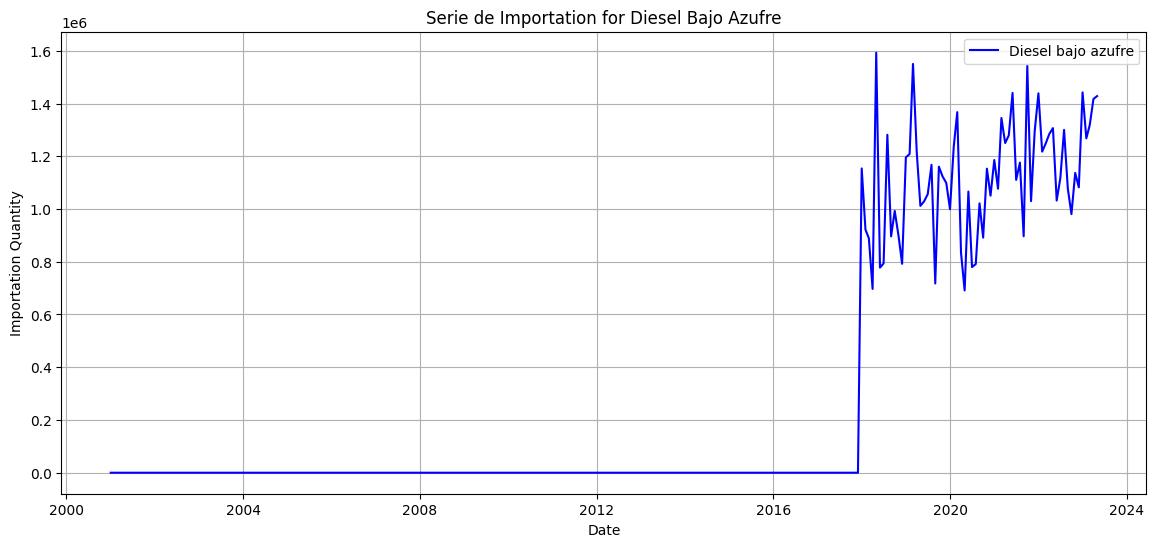

In [53]:
plt.figure(figsize=(14, 6))
plt.plot(importacion['Fecha'], importacion['Diesel bajo azufre'], label='Diesel bajo azufre', color='blue')
plt.title('Serie de Importation for Diesel Bajo Azufre')
plt.xlabel('Date')
plt.ylabel('Importation Quantity')
plt.grid(True)
plt.legend()
plt.show()

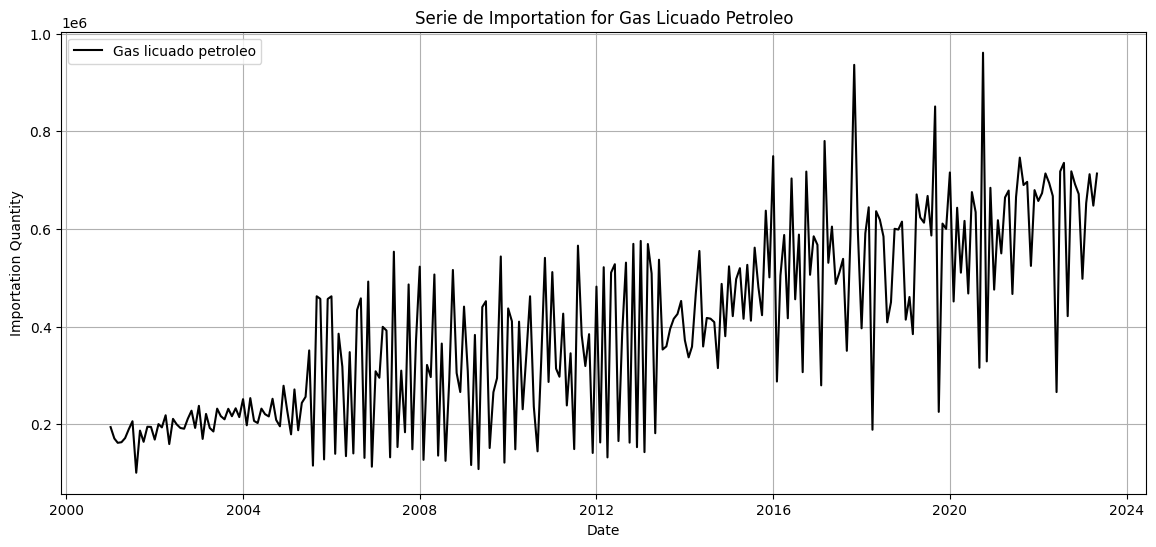

In [54]:
plt.figure(figsize=(14, 6))
plt.plot(importacion['Fecha'], importacion['Gas licuado petroleo'], label='Gas licuado petroleo', color='black')
plt.title('Serie de Importation for Gas Licuado Petroleo')
plt.xlabel('Date')
plt.ylabel('Importation Quantity')
plt.grid(True)
plt.legend()
plt.show()

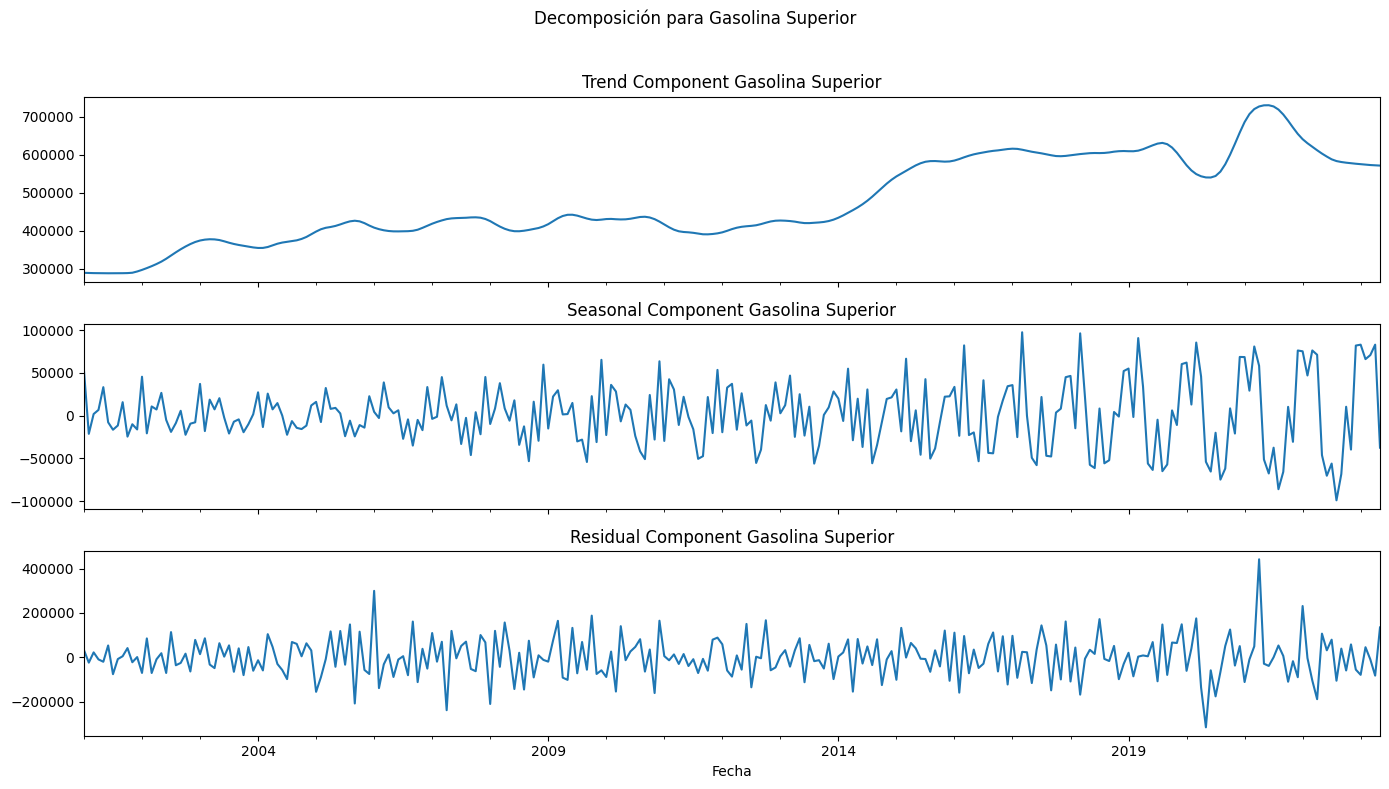

In [56]:
gasolina_superior_series = importacion.set_index('Fecha')['Gasolina superior']

stl_gasolina_superior = STL(gasolina_superior_series, seasonal=13) 
result_gasolina_superior = stl_gasolina_superior.fit()
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(14, 8), sharex=True)
result_gasolina_superior.trend.plot(ax=ax1, title='Trend Component Gasolina Superior')
result_gasolina_superior.seasonal.plot(ax=ax2, title='Seasonal Component Gasolina Superior')
result_gasolina_superior.resid.plot(ax=ax3, title='Residual Component Gasolina Superior')
plt.suptitle('Decomposición para Gasolina Superior')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

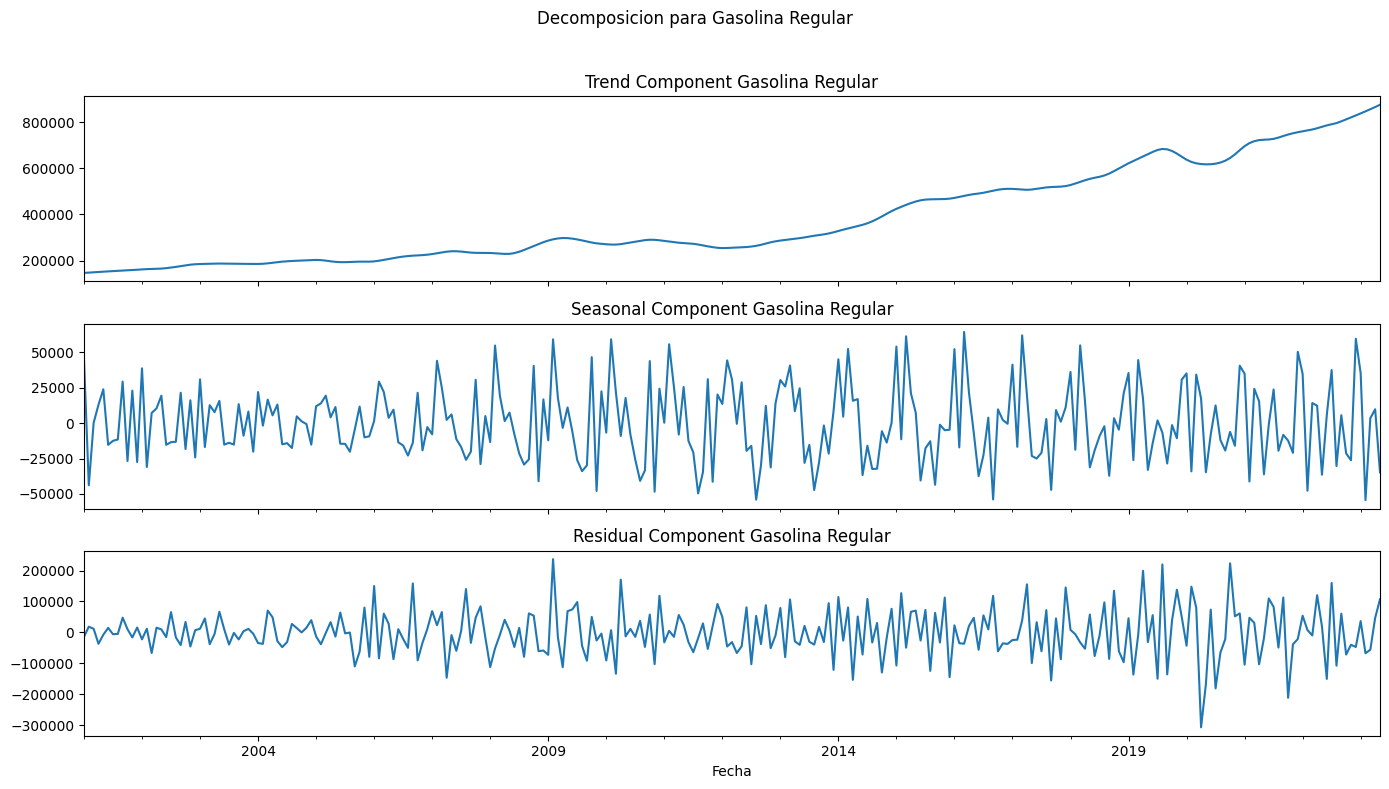

In [57]:
gasolina_regular_series = importacion.set_index('Fecha')['Gasolina regular']

stl_gasolina_regular = STL(gasolina_regular_series, seasonal=13)
result_gasolina_regular = stl_gasolina_regular.fit()

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(14, 8), sharex=True)
result_gasolina_regular.trend.plot(ax=ax1, title='Trend Component Gasolina Regular')
result_gasolina_regular.seasonal.plot(ax=ax2, title='Seasonal Component Gasolina Regular')
result_gasolina_regular.resid.plot(ax=ax3, title='Residual Component Gasolina Regular')
plt.suptitle('Decomposicion para Gasolina Regular')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

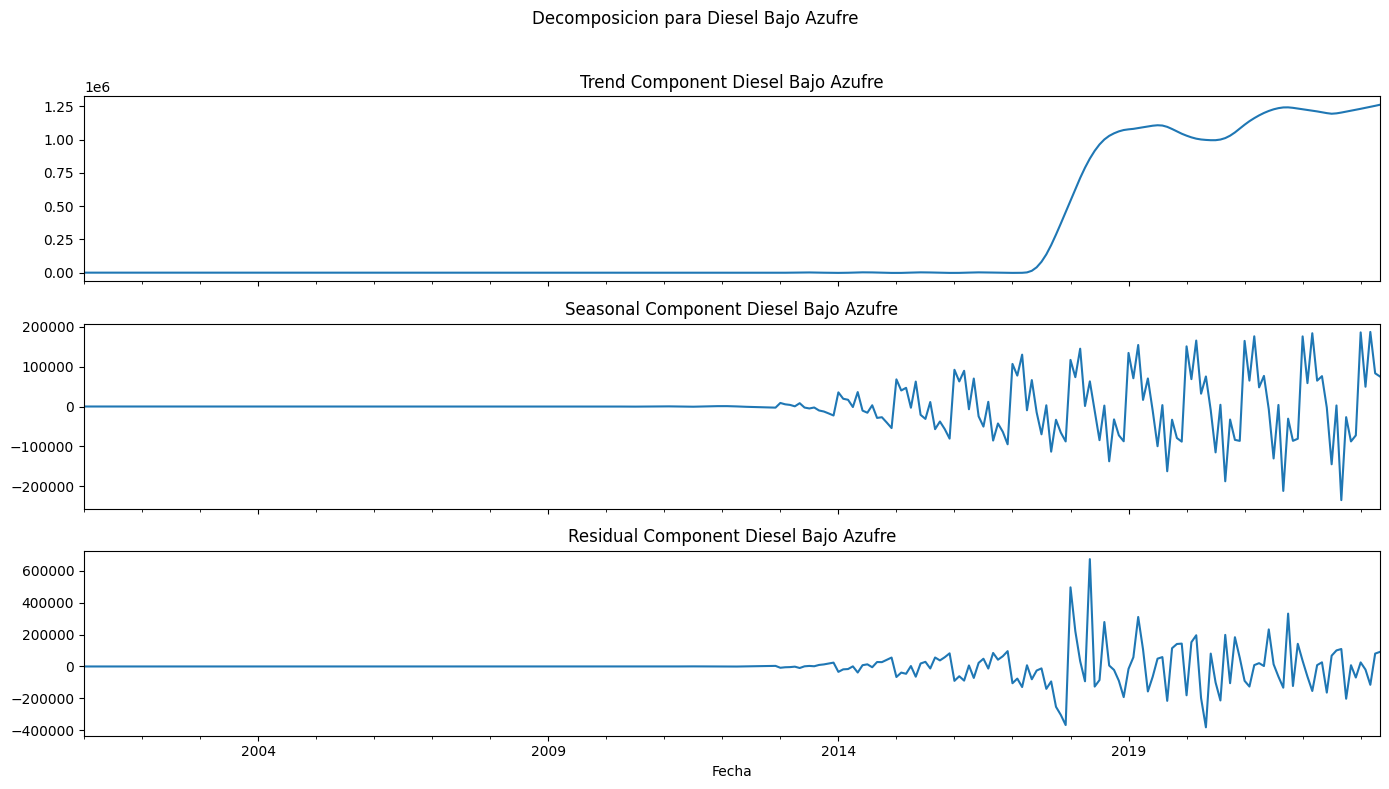

In [58]:
diesel_bajo_azufre_series = importacion.set_index('Fecha')['Diesel bajo azufre']

stl_diesel_bajo_azufre = STL(diesel_bajo_azufre_series, seasonal=13)
result_diesel_bajo_azufre = stl_diesel_bajo_azufre.fit()

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(14, 8), sharex=True)
result_diesel_bajo_azufre.trend.plot(ax=ax1, title='Trend Component Diesel Bajo Azufre')
result_diesel_bajo_azufre.seasonal.plot(ax=ax2, title='Seasonal Component Diesel Bajo Azufre')
result_diesel_bajo_azufre.resid.plot(ax=ax3, title='Residual Component Diesel Bajo Azufre')
plt.suptitle('Decomposicion para Diesel Bajo Azufre')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

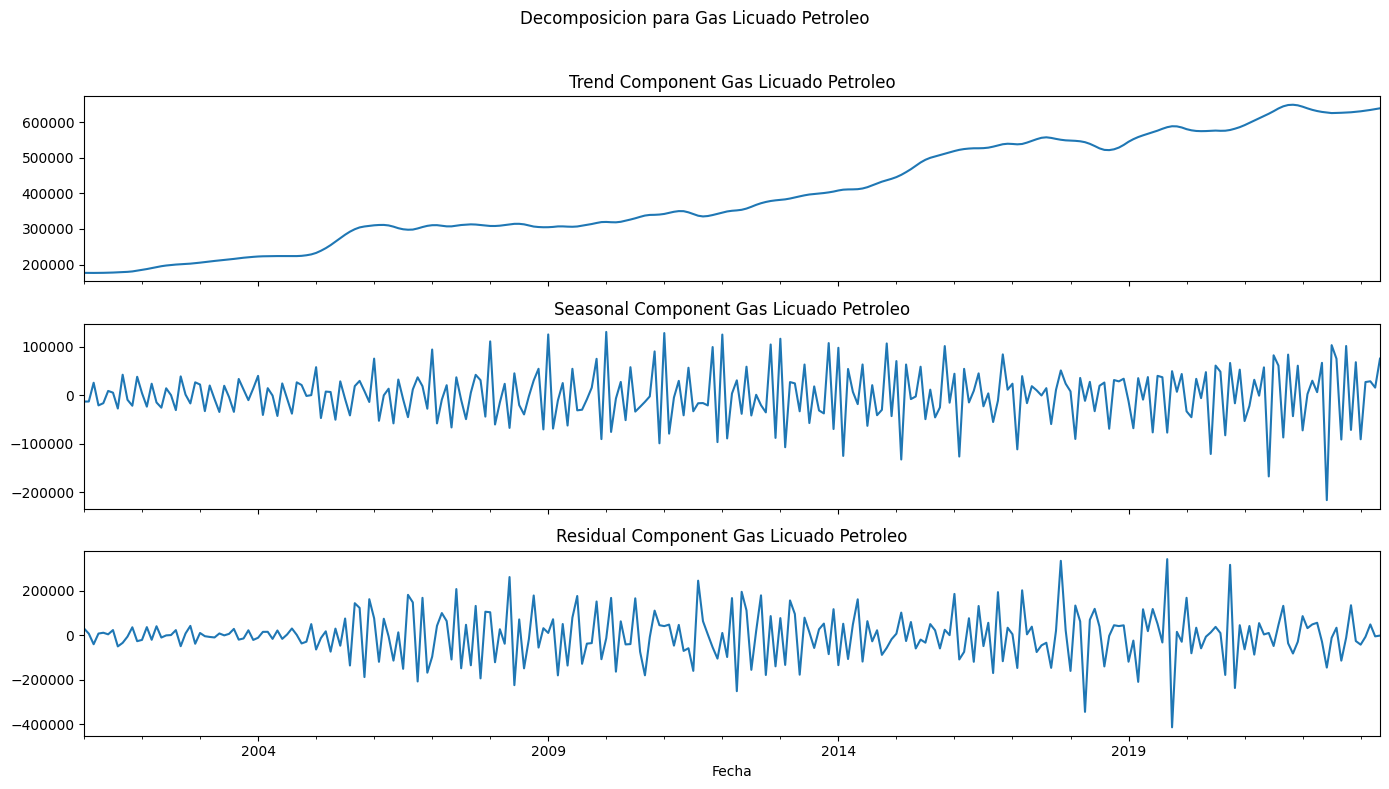

In [59]:
gas_licuado_petroleo_series = importacion.set_index('Fecha')['Gas licuado petroleo']

stl_gas_licuado_petroleo = STL(gas_licuado_petroleo_series, seasonal=13)
result_gas_licuado_petroleo = stl_gas_licuado_petroleo.fit()

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(14, 8), sharex=True)
result_gas_licuado_petroleo.trend.plot(ax=ax1, title='Trend Component Gas Licuado Petroleo')
result_gas_licuado_petroleo.seasonal.plot(ax=ax2, title='Seasonal Component Gas Licuado Petroleo')
result_gas_licuado_petroleo.resid.plot(ax=ax3, title='Residual Component Gas Licuado Petroleo')
plt.suptitle('Decomposicion para Gas Licuado Petroleo')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

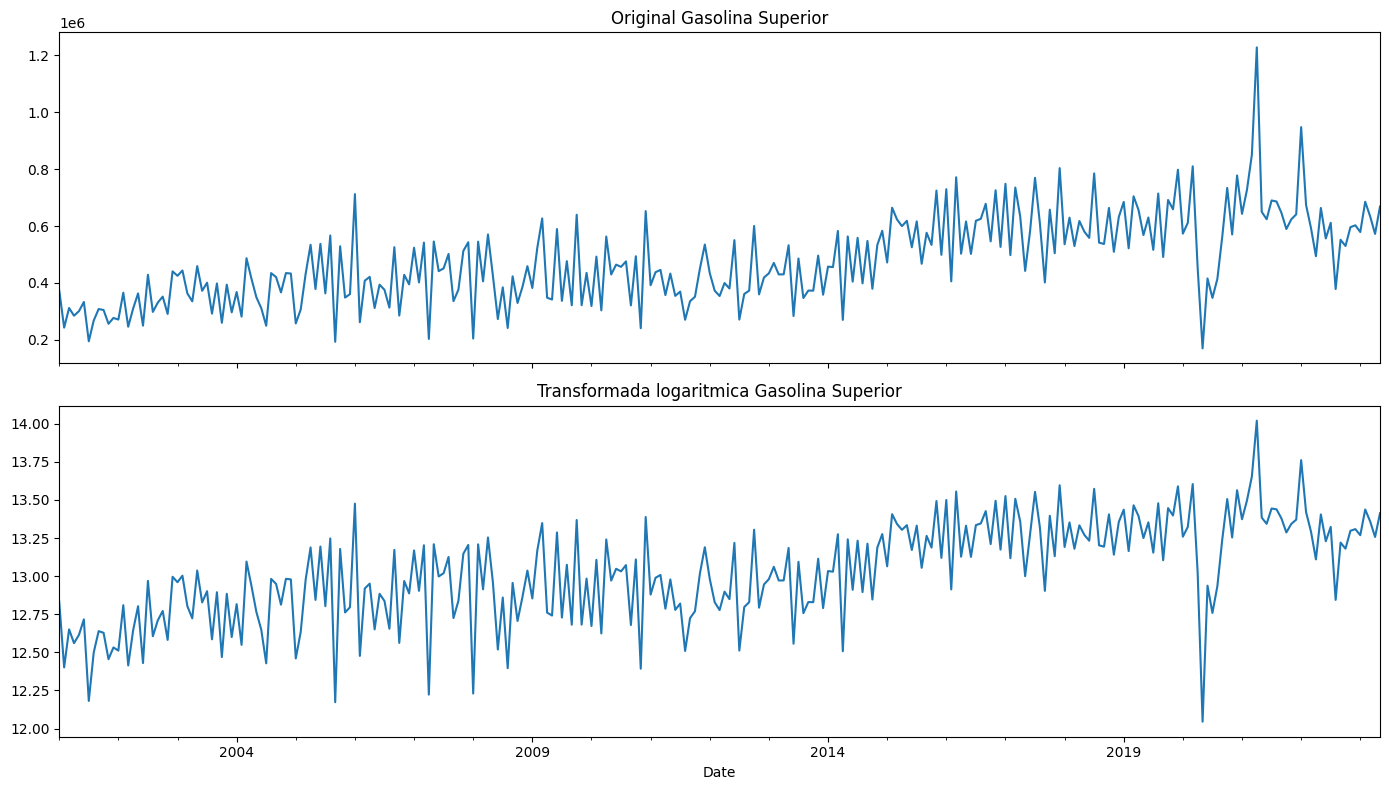

In [61]:
log_gasolina_superior_series = np.log(gasolina_superior_series)

fig, (ax1, ax2) = plt.subplots(2, figsize=(14, 8), sharex=True)
gasolina_superior_series.plot(ax=ax1, title='Original Gasolina Superior')
log_gasolina_superior_series.plot(ax=ax2, title='Transformada logaritmica Gasolina Superior')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

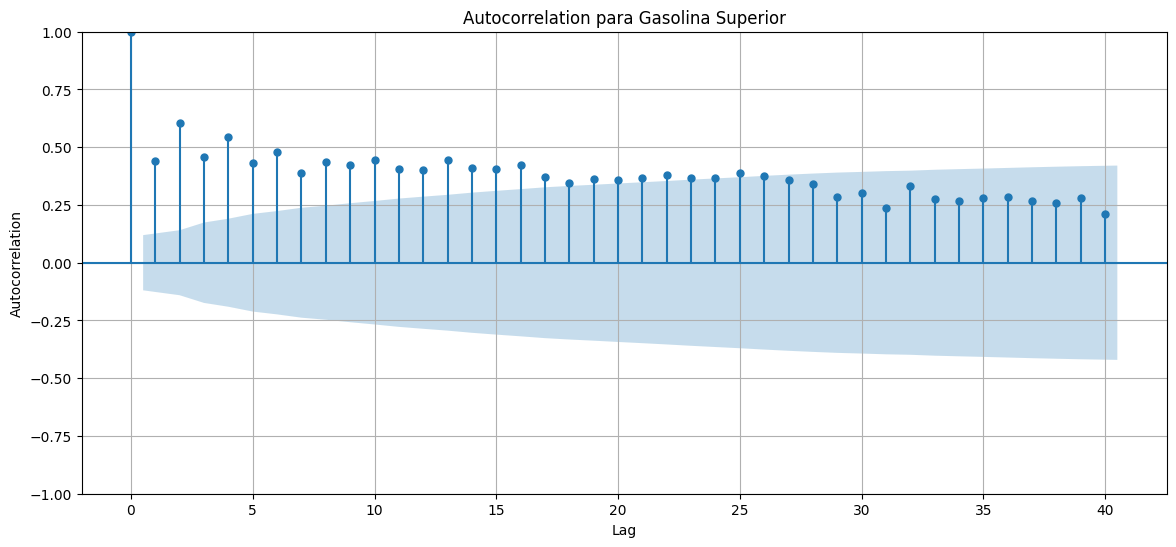

In [62]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(14, 6))
plot_acf(gasolina_superior_series, ax=ax, lags=40)
plt.title('Autocorrelation para Gasolina Superior')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

In [63]:
# E. ii. Prueba Dickey-Fuller Aumentada (ADF)
from statsmodels.tsa.stattools import adfuller

# Performing the Dickey-Fuller Augmented test on the time series for "Gasolina superior"
adf_result_gasolina_superior = adfuller(gasolina_superior_series)

# Extracting the test statistic, p-value, and critical values
adf_statistic = adf_result_gasolina_superior[0]
p_value = adf_result_gasolina_superior[1]
critical_values = adf_result_gasolina_superior[4]

adf_statistic, p_value, critical_values

(-3.028434700954416,
 0.03232293895189877,
 {'1%': -3.4552699038400827,
  '5%': -2.8725092359464526,
  '10%': -2.5726152830188678})

Esto nos indica que nuestro valores criticos son menores al valor estadistico, con esto se puede decir que la serie con la que se esta trabajando no posee estacionaridad en media

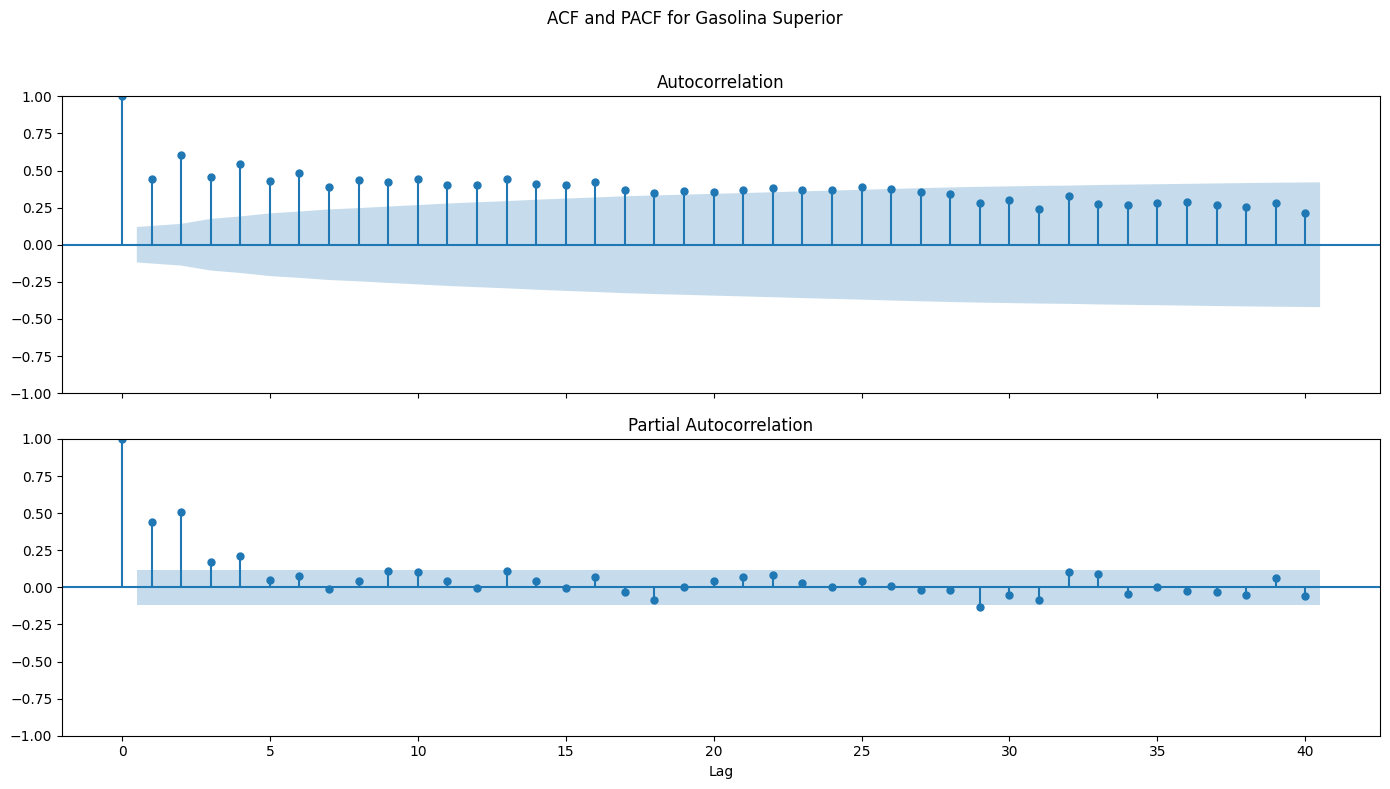

In [64]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1, ax2) = plt.subplots(2, figsize=(14, 8), sharex=True)
plot_acf(gasolina_superior_series, ax=ax1, lags=40)
plot_pacf(gasolina_superior_series, ax=ax2, lags=40)
plt.xlabel('Lag')
plt.suptitle('ACF and PACF for Gasolina Superior')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [66]:
from statsmodels.tsa.arima.model import ARIMA

def fit_arima_model(series, order):
    model = ARIMA(series, order=order)
    result = model.fit()
    return result

arima_111_model = fit_arima_model(gasolina_superior_series, order=(1,1,1))

arima_orders = [
    (0,1,1),
    (1,1,0),
    (2,1,1),
    (2,1,0),
    (1,1,2),
    (2,1,2)
]

arima_summaries = {
    "Order": [],
    "AIC": [],
    "BIC": []
}

arima_summaries["Order"].append((1,1,1))
arima_summaries["AIC"].append(arima_111_model.aic)
arima_summaries["BIC"].append(arima_111_model.bic)

for order in arima_orders:
    model_result = fit_arima_model(gasolina_superior_series, order)
    arima_summaries["Order"].append(order)
    arima_summaries["AIC"].append(model_result.aic)
    arima_summaries["BIC"].append(model_result.bic)

arima_summaries_df = pd.DataFrame(arima_summaries)

arima_summaries_df.sort_values(by="AIC", ascending=True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.f

,Order,AIC,BIC
3,"(2, 1, 1)",6994.622921,7008.986869
5,"(1, 1, 2)",6996.030543,7010.394491
6,"(2, 1, 2)",6996.363863,7014.318798
0,"(1, 1, 1)",7002.322954,7013.095915
1,"(0, 1, 1)",7010.215774,7017.397748
4,"(2, 1, 0)",7028.888073,7039.661034
2,"(1, 1, 0)",7044.251492,7051.433466


El modelo mas adaptado para este ejercicio es el (2, 1, 1).